In [1]:
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
# Load the query image
query_img = cv2.imread('/home/deeteecee/PycharmProjects/pikauto/dir/pokemon_1_7.jpg', cv2.IMREAD_GRAYSCALE)

In [49]:
# Define a list of image filenames to compare with and their associated information
image_filenames = os.listdir('/home/deeteecee/PycharmProjects/pikauto/template')

In [50]:
# Define the threshold for matching score
threshold = 0.4

In [51]:
# Initialize variables to store the most similar image and its information
most_similar_image = None
most_similar_score = 0

In [52]:
# Loop through each image and perform template matching

for i, image_filename in enumerate(image_filenames):
    # Load the template image
    template_img = cv2.imread('template/'+image_filename, cv2.IMREAD_GRAYSCALE)

    # Get the height and width of the template image
    th, tw = template_img.shape[:2]

    # Perform template matching and get the maximum matching score and location
    result = cv2.matchTemplate(query_img, template_img, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(min_val, max_val)
    # If the maximum matching score is above the threshold and higher than previous matches, update most similar image information
    if max_val > threshold and max_val > most_similar_score:
        most_similar_image = template_img
        most_similar_score = max_val

0.3400556147098541 0.3400556147098541
0.25221648812294006 0.25221648812294006
0.3733605146408081 0.3733605146408081
0.3134072721004486 0.3134072721004486
0.35059410333633423 0.35059410333633423
0.3149697184562683 0.3149697184562683
0.2525193393230438 0.2525193393230438
0.4533241093158722 0.4533241093158722
0.387478232383728 0.387478232383728
0.29245010018348694 0.29245010018348694
0.4070327877998352 0.4070327877998352
0.4130391776561737 0.4130391776561737
0.4036988317966461 0.4036988317966461
0.3085363507270813 0.3085363507270813
0.34079480171203613 0.34079480171203613
0.4643896818161011 0.4643896818161011
0.34243637323379517 0.34243637323379517
0.30489256978034973 0.30489256978034973
0.29834723472595215 0.29834723472595215
0.26029548048973083 0.26029548048973083
0.23276737332344055 0.23276737332344055
0.23878124356269836 0.23878124356269836
0.38448628783226013 0.38448628783226013
0.19608035683631897 0.19608035683631897
0.1671081930398941 0.1671081930398941
0.35394176840782166 0.353941

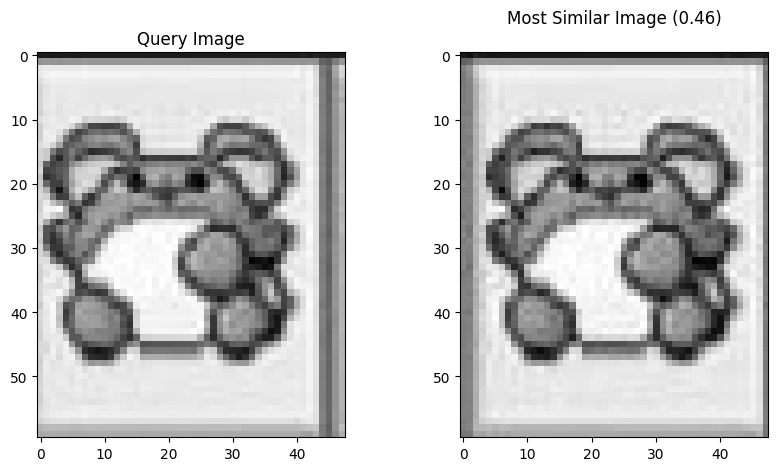

In [53]:
# Display the query image and the most similar image (if found)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(query_img, cmap='gray')
ax1.set_title('Query Image')
if most_similar_image is not None:
    ax2.imshow(most_similar_image, cmap='gray')
    ax2.set_title(f'Most Similar Image ({most_similar_score:.2f})\n')
else:
    ax2.axis('off')
    ax2.set_title('No Similar Image Found')

plt.show()